<a href="https://colab.research.google.com/github/mimi56798li/AI-Customer-Support/blob/main/anomaly_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anomaly detection system

In [17]:
import  pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [2]:

df =pd.read_csv('/content/Copy of FinancialMarketData.xlsx - EWS.csv')

In [3]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [5]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [6]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [7]:
df = df.drop_duplicates()

In [8]:
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

In [9]:
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    df = df.fillna(method='ffill').fillna(method='bfill')

In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [11]:
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(scaled_df)


IsolationForest(contamination=0.05, random_state=42)

In [12]:
df['Anomaly_Score'] = model.decision_function(scaled_df)
df['Anomaly'] = model.predict(scaled_df)

In [13]:
anomalies = df[df['Anomaly'] == -1]

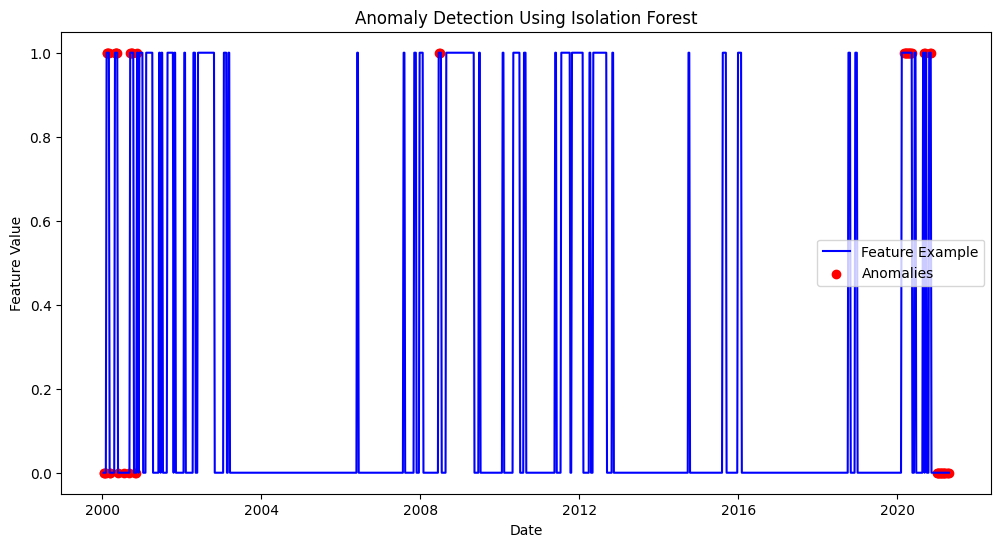

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df.iloc[:, 0], label='Feature Example', color='blue')
plt.scatter(anomalies.index, anomalies.iloc[:, 0], color='red', label='Anomalies')
plt.title('Anomaly Detection Using Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Feature Value')
plt.legend()
plt.show()


# **milestones 2**

In [21]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Data'])  # Convert date column to datetime
df.set_index('Date', inplace=True)
df.drop(['Data'], axis=1, inplace=True)

In [23]:
df.fillna(df.mean(), inplace=True)


In [25]:
target = 'Y'  # Target variable (1 for positive returns, 0 for negative returns)
features = df.columns.drop(['Y'])  # All other columns are features

X = df[features]
y = df[target]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9282511210762332
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       177
           1       0.89      0.74      0.81        46

    accuracy                           0.93       223
   macro avg       0.91      0.86      0.88       223
weighted avg       0.93      0.93      0.93       223



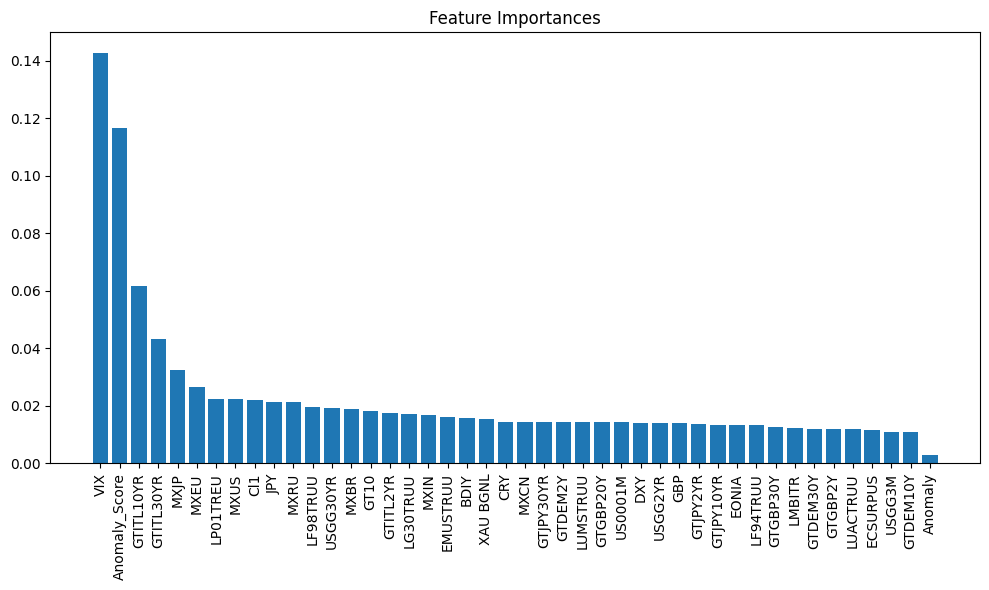

In [27]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [28]:
X['Signal'] = model.predict(X)

In [56]:
df['Returns'] = X['Signal'].shift(1) * df['MXBR']  # Example using 'MXBR' as asset price proxy
df['Cumulative Returns'] = (1 + df['Returns']).cumprod()

In [50]:
try:
    df['Cumulative Returns'] = (1 + df['Returns']).cumprod()
except RuntimeWarning as e:
    print("Warning encountered:", e)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


In [51]:
df['Returns'] = X['Signal'].shift(1) * df['XAU BGNL']  # Example using 'XAU BGNL' as asset price proxy
df['Cumulative Returns'] = (1 + df['Returns']).cumprod()

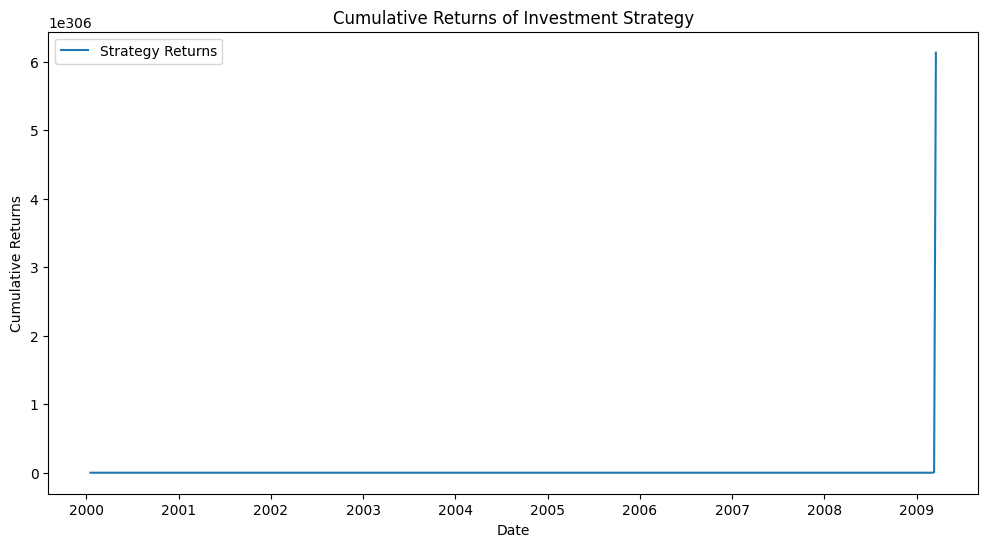

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df['Cumulative Returns'], label="Strategy Returns")
plt.title("Cumulative Returns of Investment Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

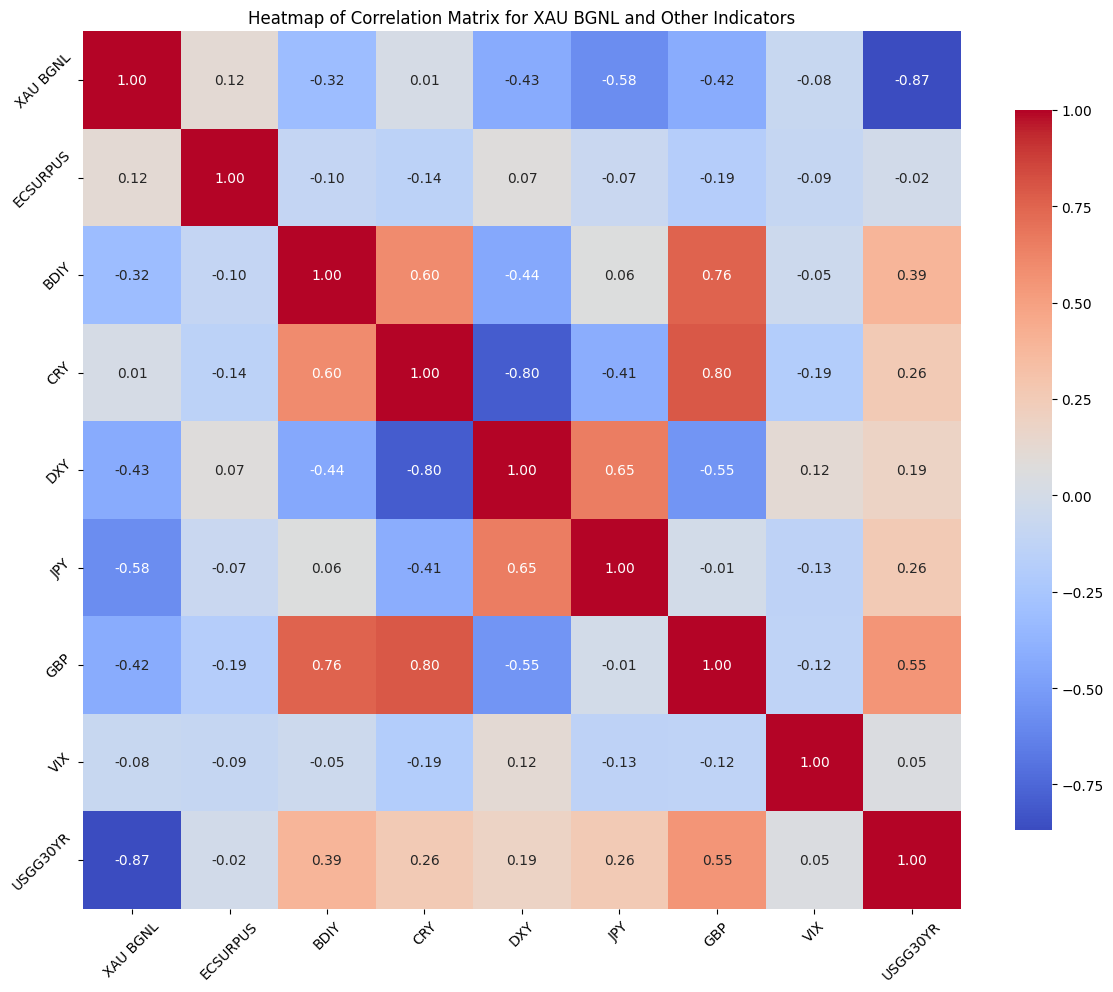

In [41]:

# Check for missing values and drop them if necessary
df.dropna(inplace=True)

# Select relevant columns including 'XAU BGNL'
relevant_columns = ['XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP', 'VIX', 'USGG30YR']
df_relevant = df[relevant_columns]

# Calculate the correlation matrix
correlation_matrix = df_relevant.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title("Heatmap of Correlation Matrix for XAU BGNL and Other Indicators")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
